<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


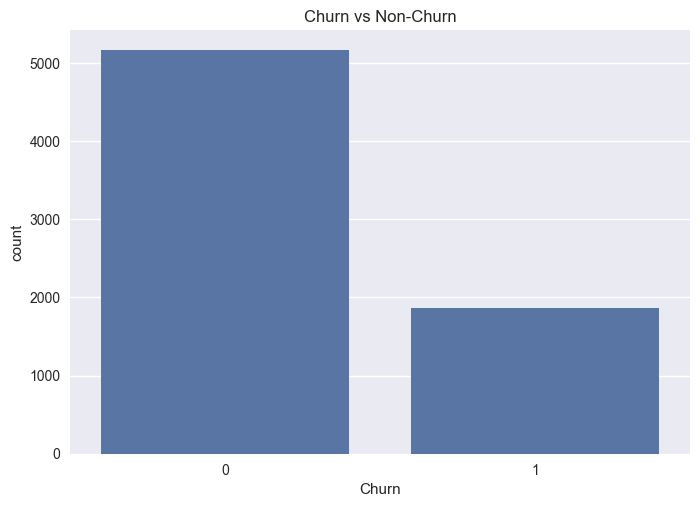

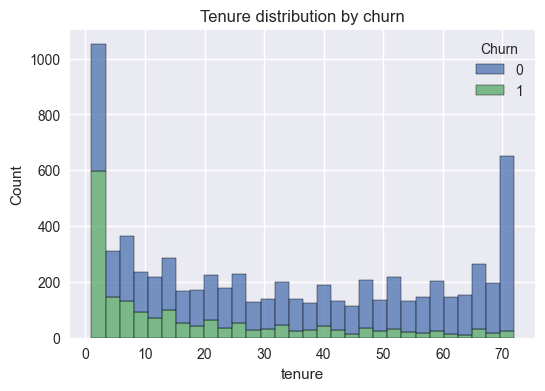

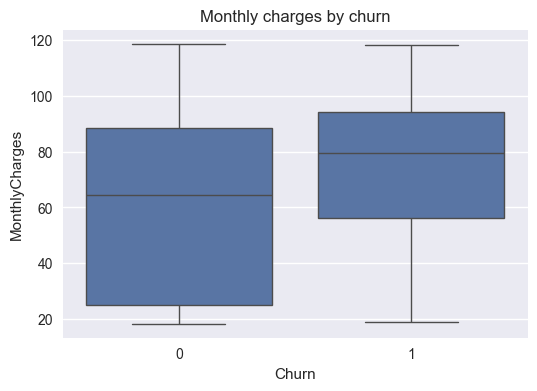

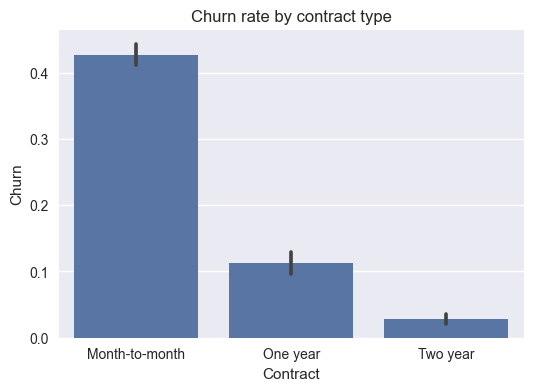

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# 1. Load data
df_raw = pd.read_csv(r"D:\Projects\Customer Churn Problem\data\raw\Telco-Customer-Churn.csv")
df_raw.head()
df_raw.info()
df_raw.isna().sum()

# 2. Basic cleaning
df = df_raw.copy()

# TotalCharges: object → numeric, coerce errors to NaN then drop
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()
df = df.dropna(subset=['TotalCharges'])

# Encode target Churn (Yes/No → 1/0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Optional: check duplicates
df.duplicated().sum()

df.info()
df.describe()

# 3. Churn rate
churn_rate = df['Churn'].mean()
print("Churn rate:", churn_rate)

# 4. EDA plots
# Churn counts
sns.countplot(data=df, x='Churn')
plt.title("Churn vs Non-Churn")
plt.savefig("../figures/churn_distribution.png", bbox_inches="tight")

# Tenure vs churn
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Tenure distribution by churn")
plt.savefig("../figures/tenure_churn.png", bbox_inches="tight")

# MonthlyCharges vs churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly charges by churn")
plt.savefig("../figures/monthly_charges_churn.png", bbox_inches="tight")

# Contract vs churn
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Contract', y='Churn')
plt.title("Churn rate by contract type")
plt.savefig("../figures/contract_churn.png", bbox_inches="tight")

# Save cleaned data for later notebooks
df.to_csv("../data/processed/telco_cleaned.csv", index=False)
